# import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from transformers import BertTokenizer

# Cài đặt style cho plot
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

c:\Users\Dell5530\Sentiment-Analysis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# thông tin cơ bản

In [2]:
DATASET_NAME = "SetFit/sst5"
raw_datasets = load_dataset(DATASET_NAME)
print(raw_datasets)

c:\Users\Dell5530\Sentiment-Analysis\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dell5530\.cache\huggingface\hub\datasets--SetFit--sst5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Repo card metadata block was not found. Setting CardData to empty.
Generating test split: 100%|██████████| 221

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 8544
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 1101
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2210
    })
})


In [7]:
# Lấy thông tin từ tập train
train_features = raw_datasets['train'].features
print("Thông tin features (tập train):")
print(train_features)

# Đặc biệt, hãy xem feature 'label'
print("\nChi tiết feature 'label':")
label_feature = train_features['label']
unique_labels = set(raw_datasets['train']['label_text'])
print(f"  Số lớp: {len(unique_labels)}")
print(f"  Các nhãn: {sorted(list(unique_labels))}")

Thông tin features (tập train):
{'text': Value('string'), 'label': Value('int64'), 'label_text': Value('string')}

Chi tiết feature 'label':
  Số lớp: 5
  Các nhãn: ['negative', 'neutral', 'positive', 'very negative', 'very positive']


In [6]:
print("--- Mẫu dữ liệu (Tập Train) ---")
for i in range(5):
    sample = raw_datasets['train'][i]
    print(f"  Label: {sample['label']} ({sample['label_text']})")
    print(f"  Text: {sample['text']}\n")

print("\n--- Mẫu dữ liệu (Tập Validation) ---")
for i in range(3):
    sample = raw_datasets['validation'][i]
    print(f"  Label: {sample['label']} ({sample['label_text']})")
    print(f"  Text: {sample['text']}\n")

--- Mẫu dữ liệu (Tập Train) ---
  Label: 4 (very positive)
  Text: a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films

  Label: 1 (negative)
  Text: apparently reassembled from the cutting-room floor of any given daytime soap .

  Label: 1 (negative)
  Text: they presume their audience wo n't sit still for a sociology lesson , however entertainingly presented , so they trot out the conventional science-fiction elements of bug-eyed monsters and futuristic women in skimpy clothes .

  Label: 2 (neutral)
  Text: the entire movie is filled with deja vu moments .

  Label: 3 (positive)
  Text: this is a visually stunning rumination on love , memory , history and the war between art and commerce .


--- Mẫu dữ liệu (Tập Validation) ---
  Label: 2 (neutral)
  Text: in his first stab at the form , jacquot takes a slightly anarchic approach that works only sporadically .

  Label: 1 (negative)
  Text: one long string of cliches .

  Label: 1 

# check phân phối

In [8]:
# Chuyển đổi toàn bộ dataset dict sang pandas
df_train = raw_datasets['train'].to_pandas()
df_val = raw_datasets['validation'].to_pandas()
df_test = raw_datasets['test'].to_pandas()

# Hiển thị 5 dòng đầu của train
print(df_train.head())

                                                text  label     label_text
0  a stirring , funny and finally transporting re...      4  very positive
1  apparently reassembled from the cutting-room f...      1       negative
2  they presume their audience wo n't sit still f...      1       negative
3  the entire movie is filled with deja vu moments .      2        neutral
4  this is a visually stunning rumination on love...      3       positive


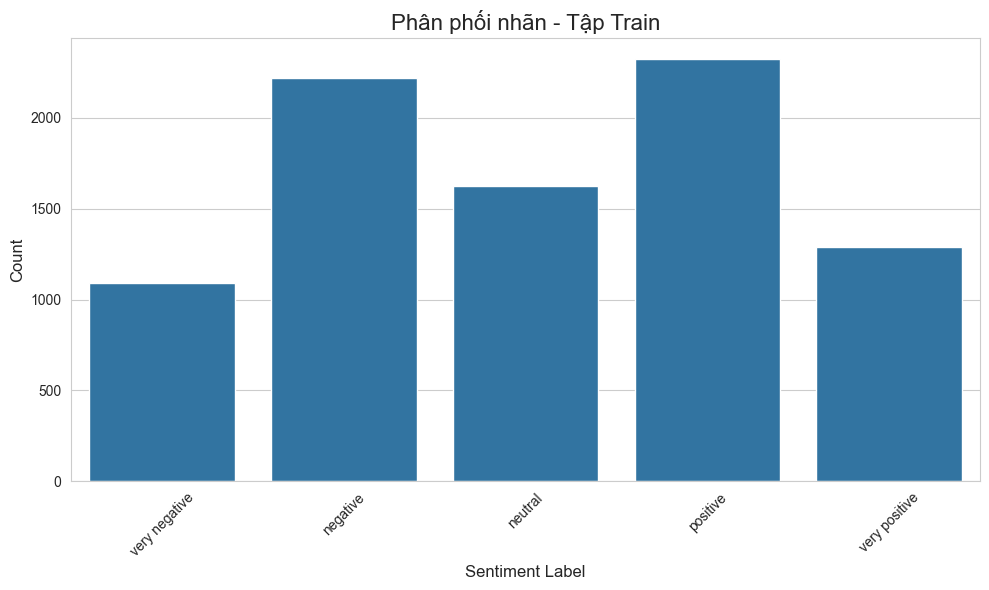

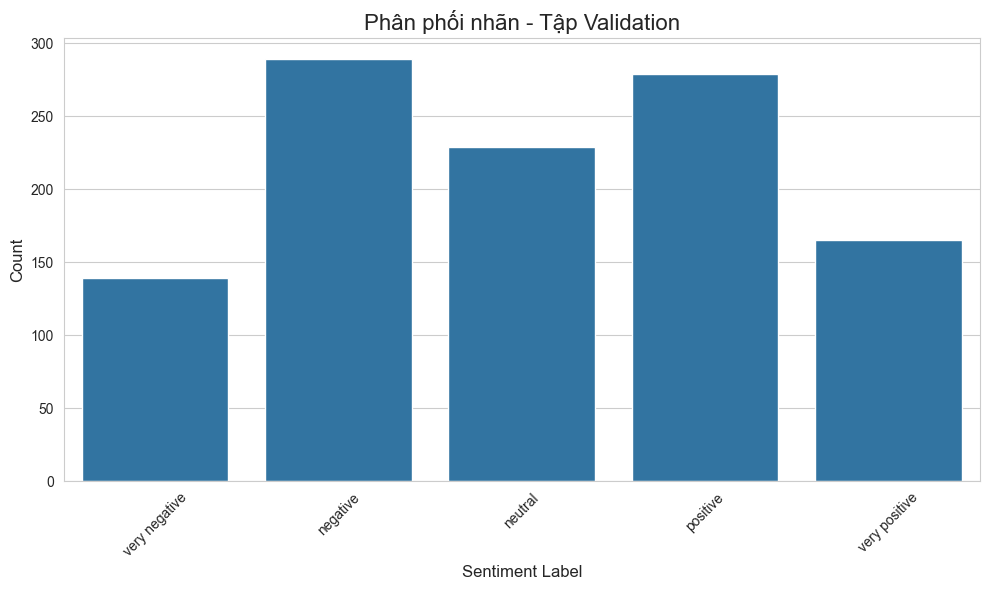

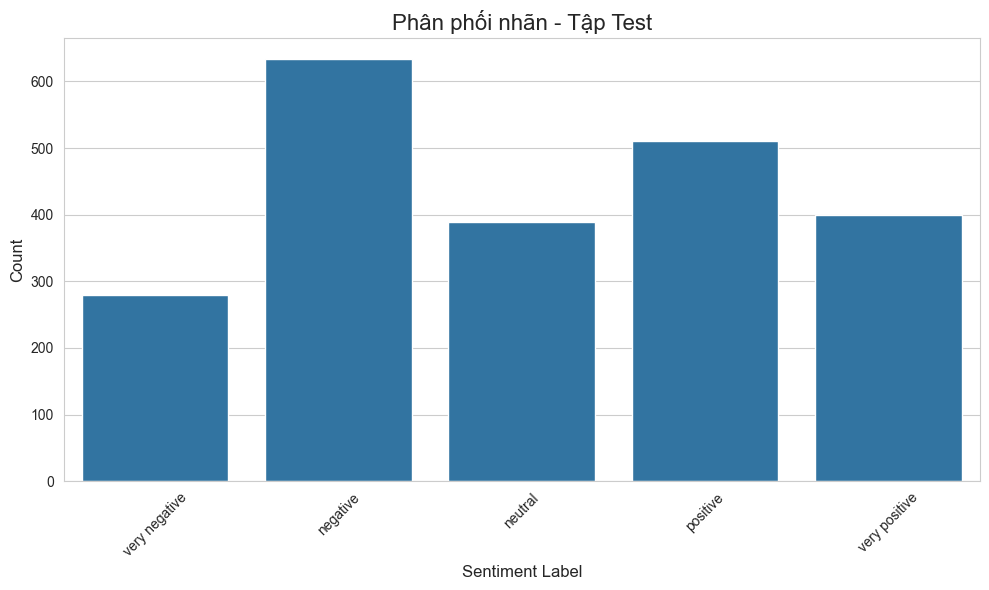

In [ ]:
def plot_label_distribution(df, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(
        x='label_text', 
        data=df,
        order=['very negative', 'negative', 'neutral', 'positive', 'very positive']  # Fixed order for consistency
    )
    plt.title(f'Phân phối nhãn - {title}', fontsize=16)
    plt.xlabel('Sentiment Label', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Vẽ cho cả 3 split
plot_label_distribution(df_train, "Tập Train")
plot_label_distribution(df_val, "Tập Validation")
plot_label_distribution(df_test, "Tập Test")

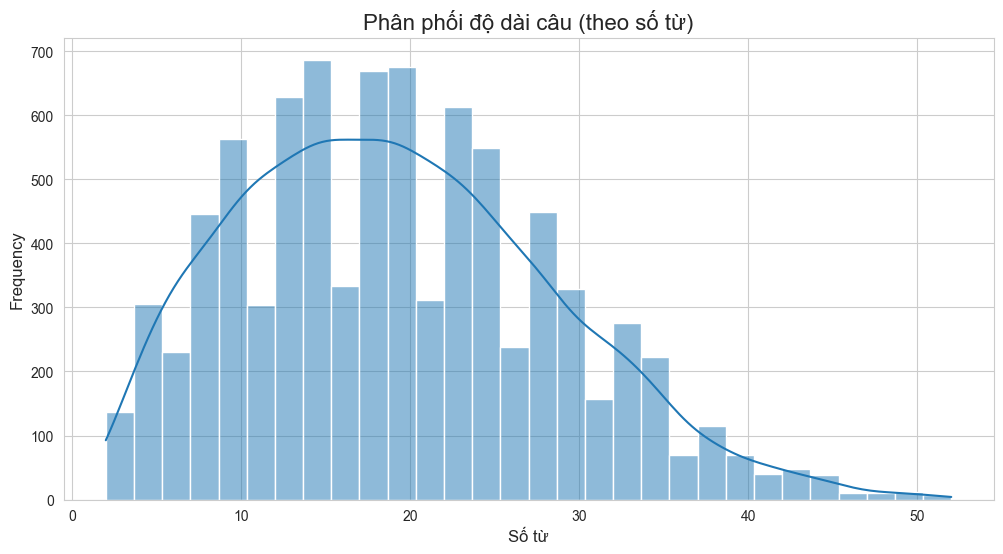


Thống kê số từ (tập Train):
count    8544.000000
mean       19.143961
std         9.306133
min         2.000000
50%        18.000000
90%        32.000000
95%        35.000000
99%        43.000000
max        52.000000
Name: word_count, dtype: float64


In [11]:
df_train['word_count'] = df_train['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(df_train['word_count'], kde=True, bins=30)
plt.title('Phân phối độ dài câu (theo số từ)', fontsize=16)
plt.xlabel('Số từ', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

print("\nThống kê số từ (tập Train):")
print(df_train['word_count'].describe(percentiles=[0.90, 0.95, 0.99]))

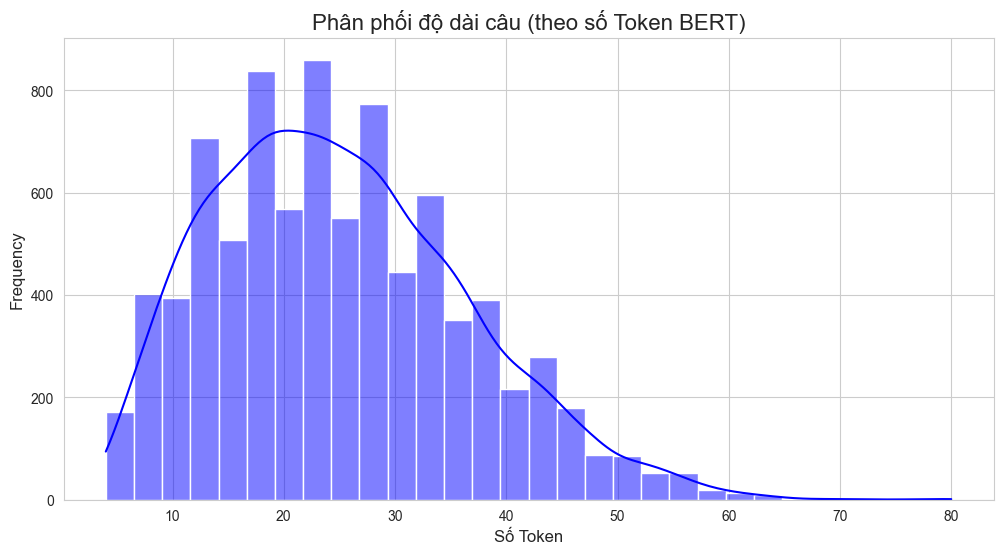


Thống kê số Token (tập Train):
count    8544.000000
mean       25.039911
std        11.399841
min         4.000000
50%        24.000000
90%        41.000000
95%        46.000000
99%        55.000000
max        80.000000
Name: token_count, dtype: float64


In [12]:
# Khởi tạo tokenizer mà chúng ta dự định dùng
BERT_MODEL_NAME = 'bert-base-uncased' # Đây là config ta sẽ dùng sau này
tokenizer = BertTokenizer.from_pretrained(BERT_MODEL_NAME)

# Tính độ dài token cho mỗi câu (bao gồm cả token đặc biệt [CLS] và [SEP])
# Chúng ta dùng .apply() của pandas cho nhanh
token_lengths = df_train['text'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))
df_train['token_count'] = token_lengths

plt.figure(figsize=(12, 6))
sns.histplot(df_train['token_count'], kde=True, bins=30, color='blue')
plt.title('Phân phối độ dài câu (theo số Token BERT)', fontsize=16)
plt.xlabel('Số Token', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

print("\nThống kê số Token (tập Train):")
print(df_train['token_count'].describe(percentiles=[0.90, 0.95, 0.99]))